In [1]:
exec(open("inc_notebook_jawad.py").read())
import logging, sys, math,os
from datetime import datetime
exec(open("classifiers/initKeras.py").read())

%matplotlib inline
dataStatsDate = datetime(2019, 11, 24)

trainClassCache = 100
validationClassCache = 0
trainBatchesPerEpoch = 10000
validationBatchesPerEpoch = 100
batch_size = 16

exec(open("classifiers/incDoodleClassifier.py").read())

current working dirC:\TFModels\DoodleForPicStory


Using TensorFlow backend.


In [2]:
model = classifierFactory.create(
    template = 'Basic',
    outputClasses = dataStats.stats['countClasses'],
    inputShape = (28, 28, 1)
)

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
__________

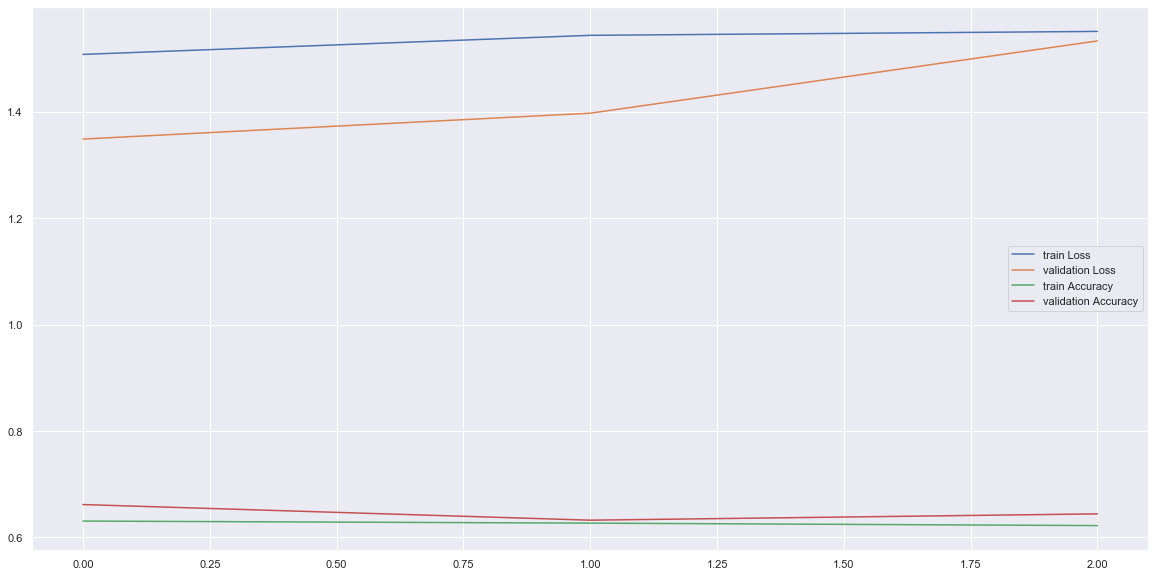

Epoch 4/50
 9957/10000 [============================>.] - ETA: 0s - loss: 1.5727 - categorical_accuracy: 0.6198

In [ ]:
histories = []
snapshots = 20
startEpoch = 0
epochPerSnapshot = 50
steps_per_epoch = trainBatchesPerEpoch
validation_steps = 100

for i in range(snapshots):
    
    histories.append( model.fit_generator( 
                        generator=trainGenerator,
                        validation_data=validationGenerator,
                        use_multiprocessing=False, 
                        workers=3, 
                        initial_epoch = startEpoch,
                        epochs=epochPerSnapshot,
                        max_q_size = 20,
                        steps_per_epoch = steps_per_epoch,
                        validation_steps = validation_steps,
                        callbacks = [livePlotKeras]
                       )
                    )
    startEpoch += epochPerSnapshot
    epochPerSnapshot += epochPerSnapshot
    classifierIO.save(model, model.name + '-ss2-' + str(i))
    pass


In [ ]:
# classifierIO.save(model, model.name)